numerical target dataset ::

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings 
warnings.filterwarnings('ignore')
lc=pd.read_csv(r"E:\Python Dataset\LungCap.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score,mean_squared_error%, matplotlib inline

In [3]:
lc.head()

LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean
0        6.475            6            62.1    no    male        no
1       10.125           18            74.7   yes  female        no
2        9.550           16            69.7    no  female       yes
3       11.125           14            71.0    no    male        no
4        4.800            5            56.9    no    male        no

In [4]:
lc.tail()

LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean
720        5.725            9            56.0    no  female        no
721        9.050           18            72.0   yes    male       yes
722        3.850           11            60.5   yes  female        no
723        9.825           15            64.9    no  female        no
724        7.100           10            67.7    no    male        no

In [5]:
lc=lc.rename(columns={"LungCap(cc)":"Lungcap"})
lc=lc.rename(columns={"Age( years)":"Age"})
lc=lc.rename(columns={"Height(inches)":"Height"})

In [6]:
lc.head()

Lungcap  Age  Height Smoke  Gender Caesarean
0    6.475    6    62.1    no    male        no
1   10.125   18    74.7   yes  female        no
2    9.550   16    69.7    no  female       yes
3   11.125   14    71.0    no    male        no
4    4.800    5    56.9    no    male        no

data cleaning::preprocessing::

In [8]:
lc.isnull().sum()

Lungcap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [9]:
lc.dtypes

Lungcap      float64
Age            int64
Height       float64
Smoke         object
Gender        object
Caesarean     object
dtype: object

In [10]:
lc.Smoke=le.fit_transform(lc.Smoke)
lc.Gender=le.fit_transform(lc.Gender)
lc.Caesarean=le.fit_transform(lc.Caesarean)

In [11]:
lc.dtypes

Lungcap      float64
Age            int64
Height       float64
Smoke          int32
Gender         int32
Caesarean      int32
dtype: object

duplicate checking::

In [13]:
lc.shape

(725, 6)

In [14]:
lc.drop_duplicates(inplace=True)

In [15]:
lc.shape

(725, 6)

EDA process::class imbalance::

In [17]:
# As lungcap column can't be consider as target column ,hence no need to check class imbalance.

outlier treatment::

In [19]:
l1=lc["Lungcap"]
l1

0       6.475
1      10.125
2       9.550
3      11.125
4       4.800
        ...  
720     5.725
721     9.050
722     3.850
723     9.825
724     7.100
Name: Lungcap, Length: 725, dtype: float64

In [20]:
outliers=[]
def detect_outlier(l1):
 threshold=3
 mean=np.mean(l1)
 std=np.std(l1)

 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l1)

In [21]:
l2=lc["Age"]
l2

0       6
1      18
2      16
3      14
4       5
       ..
720     9
721    18
722    11
723    15
724    10
Name: Age, Length: 725, dtype: int64

In [22]:
outliers=[]
def detect_outlier(l2):
 threshold=3
 mean=np.mean(l2)
 std=np.std(l2)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l2)

In [23]:
l3=lc["Height"]
l3

0      62.1
1      74.7
2      69.7
3      71.0
4      56.9
       ... 
720    56.0
721    72.0
722    60.5
723    64.9
724    67.7
Name: Height, Length: 725, dtype: float64

In [24]:
outliers=[]
def detect_outlier(l3):
 threshold=3
 mean=np.mean(l3)
 std=np.std(l3)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l3)

Detect & impute the outliers::

<Axes: ylabel='Lungcap'>

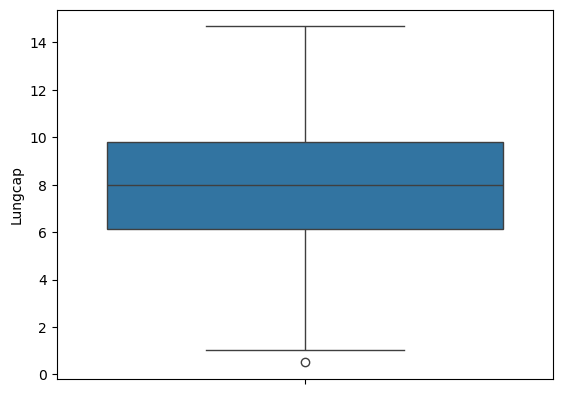

In [26]:
import seaborn as sns
sns.boxplot(data=lc,y="Lungcap")# no outlier is present.no skewness is present also.

<Axes: >

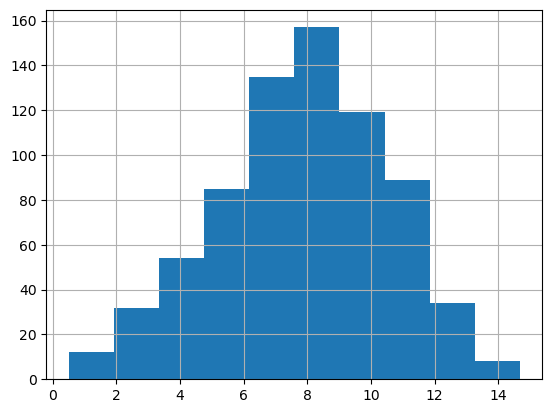

In [27]:
lc.Lungcap.hist()

<Axes: xlabel='Lungcap', ylabel='Density'>

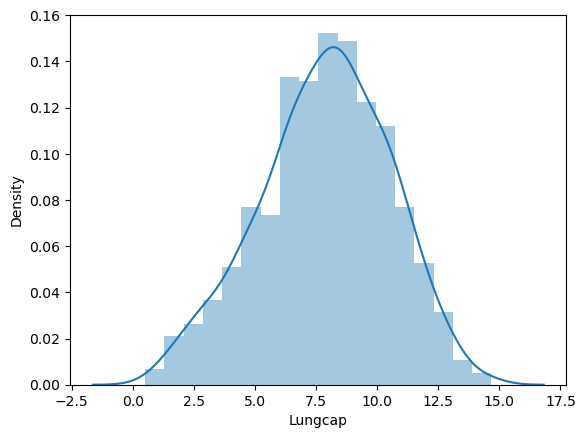

In [28]:
sns.distplot(lc.Lungcap)

In [29]:
ub=lc["Lungcap"].mean()+3*lc["Lungcap"].std()
lb=lc["Lungcap"].mean()-3*lc["Lungcap"].std()
print(ub,lb)

15.849172332243054 -0.12287715982926262


In [30]:
lc["Lungcap"].describe()

count    725.000000
mean       7.863148
std        2.662008
min        0.507000
25%        6.150000
50%        8.000000
75%        9.800000
max       14.675000
Name: Lungcap, dtype: float64

<Axes: ylabel='Lungcap'>

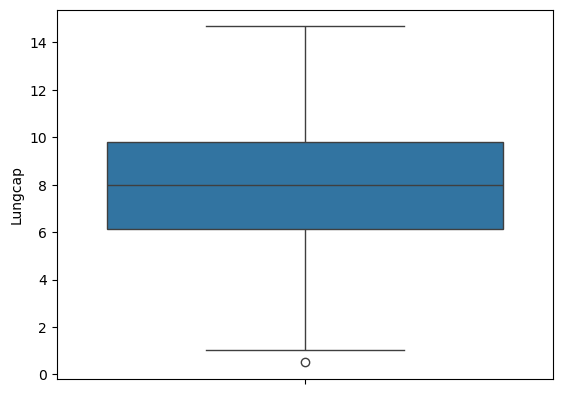

In [31]:
lc.loc[lc["Lungcap"]<lb,"Lungcap"]=lb
sns.boxplot(data=lc,y="Lungcap")

<Axes: ylabel='Height'>

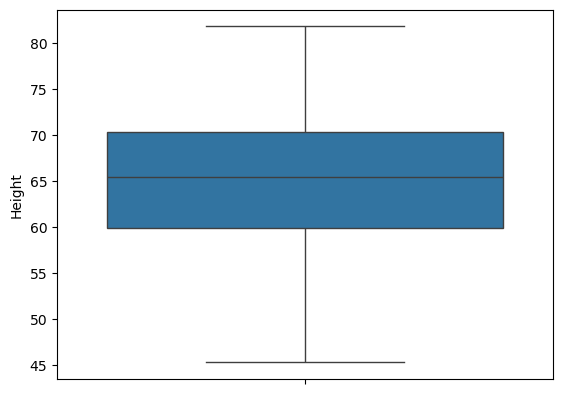

In [32]:
sns.boxplot(data=lc,y="Height")#no outlier is present.no skewness is present also.

<Axes: >

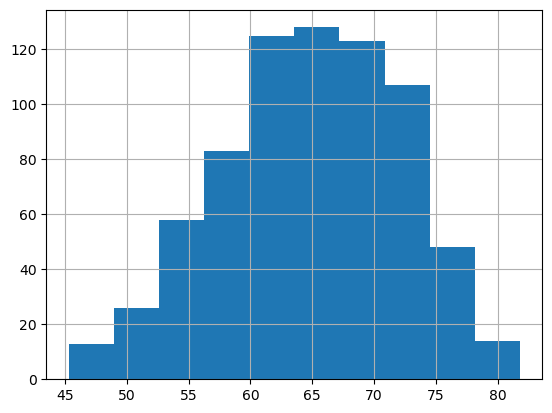

In [33]:
lc.Height.hist()

<Axes: xlabel='Height', ylabel='Density'>

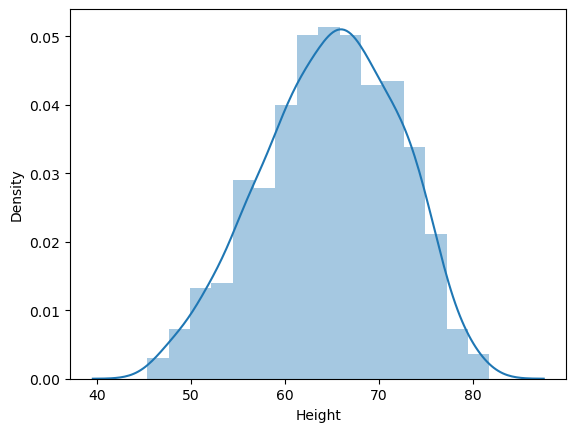

In [34]:
sns.distplot(lc.Height)

<Axes: ylabel='Age'>

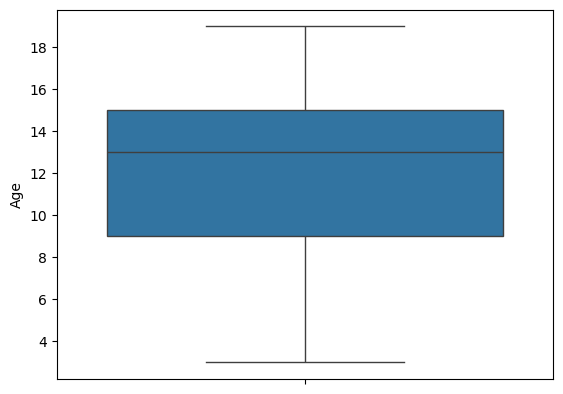

In [35]:
sns.boxplot(data=lc,y="Age")

<Axes: >

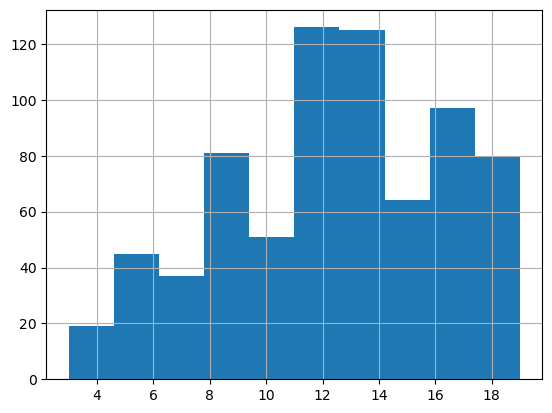

In [36]:
lc.Age.hist()

<Axes: xlabel='Age', ylabel='Density'>

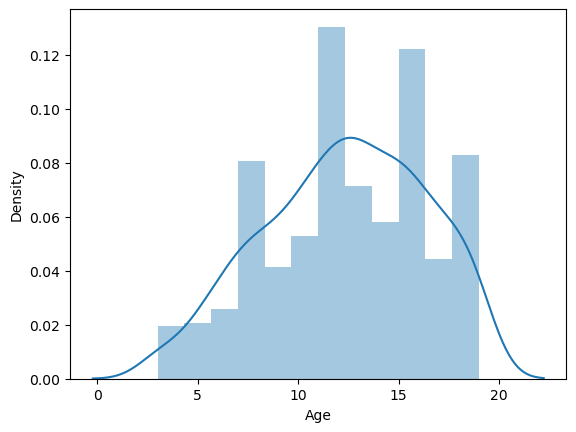

In [37]:
sns.distplot(lc.Age)

skewness treatment is required for Age column:

In [39]:
up=lc["Age"].mean()+3*lc["Age"].std()
lb=lc["Age"].mean()-3*lc["Age"].std()
print(up,lb)

24.34114509385136 0.31264800959691463


In [40]:
lc["Age"].describe()

count    725.000000
mean      12.326897
std        4.004750
min        3.000000
25%        9.000000
50%       13.000000
75%       15.000000
max       19.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

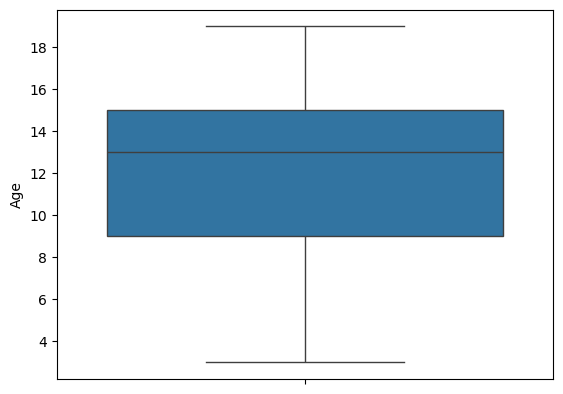

In [41]:
lc.loc[lc["Age"]<lb,"Age"]=lb
sns.boxplot(data=lc,y="Age")

IQR::

In [43]:
IQR=lc.Age.quantile(0.75)-lc.Age.quantile(0.25)
L1=lc["Age"].quantile(0.25)-(IQR*3)
U1=lc["Age"].quantile(0.75)+(IQR*3)
print(L1,U1)

-9.0 33.0


<Axes: xlabel='Age', ylabel='Density'>

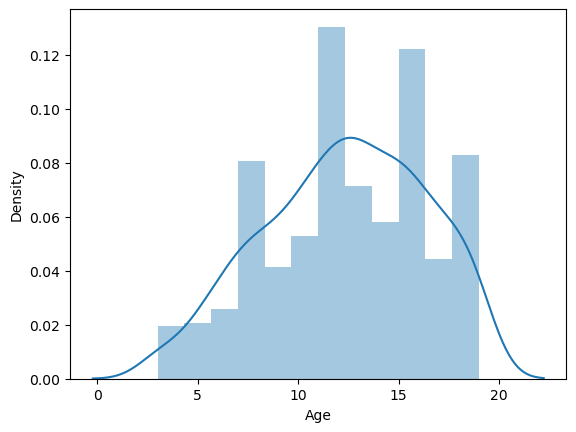

In [44]:
lc.loc[lc["Age"]<L1,"Age"]=L1
sns.distplot(lc.Age)

In [45]:
lc.Age.skew()

-0.2579439836892384

In [46]:
import numpy as np
np.log(0)

-inf

In [47]:
lc.shape

(725, 6)

In [48]:
lc_new=lc[lc.Age>0]
lc_new.shape

(725, 6)

In [49]:
lc["Age"]=np.log(lc["Age"])
lc.Age.skew()

-1.167378704361908

<Axes: xlabel='Age', ylabel='Density'>

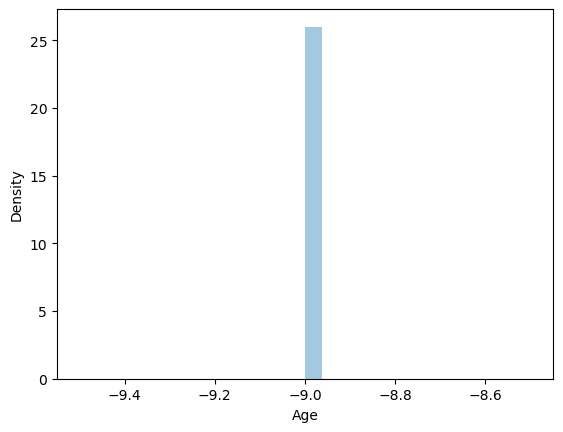

In [50]:
lc_new.loc[lc["Age"]>L1,"Age"]=L1
sns.distplot(lc_new.Age)

In [51]:
data1=lc.corr()
data1

Lungcap       Age    Height     Smoke    Gender  Caesarean
Lungcap    1.000000  0.800859  0.912187  0.101374  0.169823   0.021317
Age        0.800859  1.000000  0.813495  0.203556 -0.034213   0.051428
Height     0.912187  0.813495  1.000000  0.176534  0.141441   0.060397
Smoke      0.101374  0.203556  0.176534  1.000000 -0.053528   0.038330
Gender     0.169823 -0.034213  0.141441 -0.053528  1.000000   0.013070
Caesarean  0.021317  0.051428  0.060397  0.038330  0.013070   1.000000

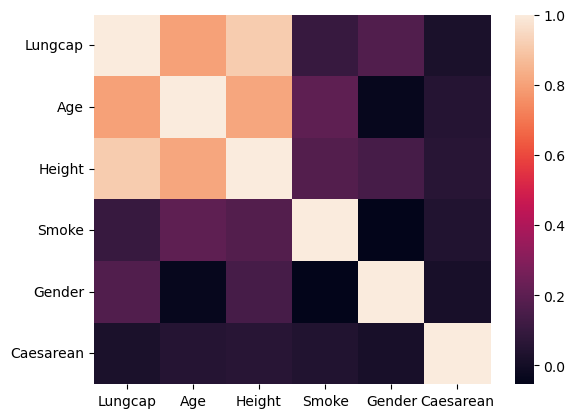

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data1)
plt.show()

Train_Test_split::

In [54]:
x=lc.iloc[:,1:]

In [55]:
x.head()
x.shape

(725, 5)

In [56]:
y=lc.iloc[:,0]

In [57]:
y.head()
y.shape

(725,)

In [58]:
import sklearn
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((580, 5), (145, 5), (580,), (145,))

Model Building ::

In [62]:
Linear regression::

SyntaxError: invalid syntax (2638615990.py, line 1)

In [ ]:
from sklearn import linear_model
linear=linear_model.LinearRegression()

In [ ]:
linear.fit(x_train,y_train)

In [ ]:
pred=linear.predict(x_test)
pred

In [ ]:
linear.coef_

In [ ]:
linear.intercept_

In [ ]:
R2=linear.score(x_train,y_train)
R2

In [ ]:
Adj_R2=1-(((1-R2)*(580-1))/(580-5-1))
Adj_R2

In [ ]:
pred_train=linear.predict(x_train)
pred_train

In [ ]:
pred_train.shape

In [ ]:
mean_y=y_train.mean()
mean_y

In [ ]:
SSE=np.sum(np.square(pred_train-y_train))
SSE

In [ ]:
SSR=np.sum(np.square(pred_train-mean_y))
SSR

In [ ]:
Rsq=SSR/(SSR+SSE)
Rsq#manual calculation

In [ ]:
from sklearn import metrics
#MAE-Mean Absolute Error
MAE=metrics.mean_absolute_error(pred,y_test)
MAE

In [ ]:
#MSE=Mean Squared Error
MSE=metrics.mean_squared_error(pred,y_test)
MSE

In [ ]:
RMSE=np.sqrt(MSE)
RMSE

In [ ]:
#MAPE
error=pred-y_test
error
error_abs=np.abs(error)
#error_abs

In [ ]:
MAPE=np.mean(error_abs/y_test)*100
MAPE

In [ ]:
Accuracy=(100-MAPE)
Accuracy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(pred,y_test)
plt.show()

In [ ]:
from scipy import stats
slope,intercepts,r,p,std_err=stats.linregress(pred,y_test)
def myfunc(y_test):
 return slope*y_test+intercepts
mymodel=list(map(myfunc,y_test))

In [ ]:
plt.scatter(pred,y_test)
plt.plot(y_test,mymodel)
plt.show()

L1= LASSO & L2=Reidge
# Generalization /regularization tech.
#To solve overfitting problem
# to handle multiocolinearity
#if model get pennalized
#to do feature selection only L1 is helping

#Lasso-L1

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
Lasso()
lc.head(1)

In [ ]:
lasso.coef_ #feature selection

In [ ]:
#y(Lungcap)=B0+X1.Age+X2.Height+X3.Smoke+X4.Gender+X5.Caesarean
#lungcap,age,height--data(LR)---R2,Adj_R2

In [ ]:
l1_pred=lasso.predict(x_test)
l1_pred

In [ ]:
l1_R2=lasso.score(x_train,y_train)
l1_R2

In [ ]:
l1_adj_R2=1-(((1-l1_R2)*(580-1))/(580-5-1))
l1_adj_R2

In [ ]:
df=pd.DataFrame({"Feature_importances":lasso.coef_,"columns":list(x)})
df

In [ ]:
df2=pd.DataFrame({"Actual":y_test,"Predictions":l1_pred})
df2

In [ ]:
MSE_l1=metrics.mean_squared_error(l1_pred,y_test)
MSE_l1

In [ ]:
sns.lmplot(x="Actual",y="Predictions",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

Ridge (L2)::

In [ ]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(x_train,y_train)
Ridge()

In [ ]:
rd_pred=rd.predict(x_test)
#rd_pred

In [ ]:
list(rd.coef_)

In [ ]:
rd_R2=rd.score(x_train,y_train)
rd_R2

In [ ]:
rd_adj_R2=1-(((1-rd_R2)*(580-1))/(580-5-1))
rd_adj_R2

In [ ]:
df_1=pd.DataFrame({"Feature_importances":rd.coef_,"columns":list(x)})
df_1

In [ ]:
df_2=pd.DataFrame({"Actual":y_test,"Predictions":rd_pred})
df_2

In [ ]:
MSE_rd=metrics.mean_squared_error(rd_pred,y_test)
MSE_rd

In [ ]:
sns.lmplot(x="Actual",y="Predictions",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

Feature Selection::

In [ ]:
df

In [86]:
lc.shape

(725, 6)

In [ ]:
l_new=lc.drop(["Smoke","Gender","Caesarean"],axis=1)
l_new.shape

In [96]:
l_new.isnull().sum()
l_new.dtypes

NameError: name 'l_new' is not defined

In [108]:
x1=l_new.iloc[:,1:]
x1.head()
y1=l_new.iloc[:,0]
y1.head()

NameError: name 'l_new' is not defined

In [104]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=101)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

NameError: name 'x1' is not defined

In [ ]:
linear.fit(x1_train,y1_train)
LinearRegression()

In [ ]:
linear_new_pred=linear.predict(x1_test)
linear_new_pred

In [ ]:
new_R2=linear.score(x1_train,y1_train)
new_R2

In [ ]:
Anew_R2=1-(((1-new_R2)*(580-1))/(580-2-1))
Anew_R2

In [ ]:
new_MSE=metrics.mean_squared_error(linear_new_pred,y1_test)
new_MSE

In [ ]:
df_new=pd.DataFrame({"Actual_n":y1_test,"Predictions_n":linear_new_pred})
df_new

In [ ]:
sns.lmplot(x="Actual_n",y="Predictions_n",data=df_new,fit_reg=False)
d_line=np.arange(df_new.min().min(),df_new.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

Final Result::

In [ ]:
list1=["Linear Regression","Lasso","Ridge","Feature_SelectionModel"]
list2=[R2,l1_R2,rd_R2,new_R2]
list3=[Adj_R2,l1_adj_R2,rd_adj_R2,Anew_R2]
list4=[MSE,MSE_l1,MSE_rd,new_MSE]

In [ ]:
Final_Result=pd.DataFrame({"Model_Name":list1,"R2_value":list2,"Adj_R2":list3,"MSE":list4})
Final_Result

In [ ]:
Final result::Linear regression model is better fitted model for lung capacity dataset .